# Проектная работа для интернет-магазина "Стримчик"


В рамках данной работы мы должны провести исследование продаж компьютерных игр для интернет-магазина "Стримчик".

В качестве исходной информации нам передали исторические данные о продажах, на основе которых нам надо выявить закономерности, определяющие успешность игры и спрогнозировать продажи на 2017 год.

Проектную работу выполним в несколько этапов:

[Шаг 1. Изучение общей информации.](#chapter2)

[Шаг 2. Предобработка данных.](#chapter3)

[Шаг 3. Исследовательский анализ данных.](#chapter4)

[Шаг 4. Составление портрета пользователя.](#chapter5)

[Шаг 5. Проверка гипотез.](#chapter6)

[Шаг 6. Общий вывод.](#chapter7)

<a id='chapter2'></a>
## Изучение общей информации


На данном этапе мы загрузим файл с данными и просмотрим их.


In [82]:
#загружаем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [83]:
#загружаем файл с данными
data = pd.read_csv('/datasets/games.csv')

In [84]:
#просмотрим первые строки таблицы
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [85]:
#просмотрим общую информацию о таблице и содержащихся данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



Итак, в загруженной таблице имеем следующие столбцы:

* <i> Name </i> - название игры

* <i> Platform </i> - платформа

* <i> Year_of_Release </i> - год выпуска

* <i> Genre </i> - жанр игры

* <i> NA_sales </i> - продажи в Северной Америке (миллионов копий)

* <i> EU_sales </i> - продажи в Европе (миллионов копий)

* <i> JP_sales </i> - продажи в Японии (миллионов копий)

* <i> Other_sales </i> - продажи в других странах (миллионов копий)

* <i> Critic_Score </i> - оценка критиков

* <i> User_Score </i> - оценка пользователей

* <i> Rating </i> - рейтинг от организации ESRB


In [86]:
#проверка количества дублирующихся строк
data.duplicated().sum()

0


Мы проверили количество дублирующихся строк. Полностью повторяющихся строк нет. Некоторые названия игр повторяются несколько раз, но это говорит о том, что одна игра выпускалась для разных платформ.


In [87]:
#просмотр нескольких строк с дублирующимися названиями игр
data[data['Name'].duplicated()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M


In [88]:
#просмотр информации по одной из игр с одинаковыми названиями
data[data['Name']=='Grand Theft Auto V'].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M



### Вывод



Загрузив полученные данные, мы видим, что в них присутствуют пропущенные значения и указаны неверные типы данных, содержащихся в столбцах. Необходимо привести данные в таблице к виду, удобному для дальнейшего анализа. Это задача для следующего этапа - предобработки данных.


<a id='chapter3'></a>
## Предобработка данных


Сперва для удобства приведем названия столбцов к нижнему регистру.


In [89]:
#перевод названий столбцов к нижнему регистру
data.columns = data.columns.str.lower()


Посчитаем количество пропущенных значений в переданной таблице.


In [90]:
#расчет количества пропущенных значений
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


В двух строчках отсутствует название компьютерной игры и жанр. Если жанр, например, можно поискать во внешних источниках, то название игры найти будет проблематично. Однако этих значений мало и на общий анализ данных они не повлияют, их можно удалить.

Однако так уже не поступить с оценками критиков и пользователей. Пропущенных значений в этих столбцах слишком много.


In [91]:
#удалим строки с пропущенными названиями
data = data.dropna(subset=['genre', 'name', 'year_of_release'])

In [92]:
#просмотр уникальных значений в столбце с пользовательскими оценками
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [93]:
#расчет количества значений tbd в столбце
data[data['user_score']=='tbd']['user_score'].value_counts()

tbd    2376
Name: user_score, dtype: int64


Также видим среди значений пользовательской оценки компьютерной игры значения <i>tbd</i>. Вероятно, это означает <i>to be determined</i>. Т.е. оценка еще неизвестна на момент выгрузки информации, но будет определена в будущем.



Ненадолго прервемся от изучения пропущенных значений и изучим типы данных, содержащихся в столбцах.

Мы видели, что некоторые столбцы имеют неверный тип данных. Так, например, столбец, содержащий информацию о годе выпуска, должен иметь целочисленный тип. А вот столбец <i> user_score </i> будет иметь float, содержащимся же в нем значениям <i>tbd</i> предварительно присвоим значение 999 для облегчения перевода этого столбца в числовой вид.


In [94]:
#замена значений tbd в столбце для последующего перевода столбца в числовой вид
data.loc[data['user_score']=='tbd', 'user_score'] = '999'

<a id='comment2'></a>

In [95]:
data[data['user_score'].isna()]['year_of_release'].unique()

array([1985., 1996., 1989., 1984., 2005., 1999., 1990., 2006., 1988.,
       2002., 2010., 1998., 2015., 2013., 2009., 2014., 1992., 1993.,
       2004., 1994., 1997., 2012., 2007., 1982., 2016., 2003., 2011.,
       1986., 2000., 2001., 1995., 2008., 1991., 1981., 1987., 1980.,
       1983.])

In [96]:
#изменение типов столбцов
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['year_of_release'] = data['year_of_release'].astype('Int64')


Посмотрим, коррелируются ли оценки пользователей и оценки критиков.


In [97]:
#корреляция столбцов с оценками критиков и пользовательскими оценками
data['critic_score'].corr(data[data['user_score']!=999]['user_score'])

0.5796706281932221


Видим, что некоторая корреляция между ними есть: чем выше оценка критиков, тем выше оценка пользователей. Попробуем заменить значения <i>tbd</i> в зависимости от оценки критиков.


<a id='comment3'></a>

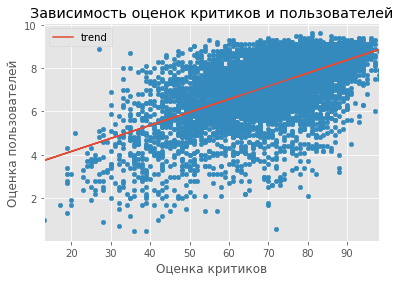

In [98]:
import warnings
warnings.simplefilter("ignore")
plt.style.use('ggplot')
#выделим отдельно данные с существующими оценками критиков и пользователей
tbd = data[(data['user_score']!=999)&(~data['user_score'].isna())&(~data['critic_score'].isna())]
#построим график зависимости оценок критиков и пользователей
ax = tbd.plot.scatter('critic_score', 'user_score')
#найдем тренд этой зависимости
z = np.polyfit(tbd['critic_score'], tbd['user_score'], 1)
func = np.poly1d(z)
tbd['trend'] = func(tbd.critic_score)
#отобразим их вместе на графике
tbd.plot(x='critic_score', y='trend', ax=ax)
plt.xlabel('Оценка критиков')
plt.ylabel('Оценка пользователей')
plt.title('Зависимость оценок критиков и пользователей')
plt.show()

In [99]:
"y=%.6fx +(%.6f)" % (z[0], z[1])

'y=0.060213x +(2.953925)'


Теперь рассмотрим пропуски в столбце с рейтингом критиков. Пропущенных значений слишком много, чтобы их удалять и игнорировать. Думаю, в данном случае неплохим вариантом будет замена их медианным значение по жанру компьютерной игры, т.к. осреднение всех данных даст слишком неточный результат.Все-таки логичнее сравнивать оценки одного и того же жанра.


In [100]:
#создаем таблицу с медианным значением
critic_genre = data.groupby(by='genre')['critic_score'].median()
critic_genre = critic_genre.reset_index().rename(columns={critic_genre.index.name: 'genre'})

In [101]:
#пропущенные значения в столбце предварительно заменяем на -1
data['critic_score'] = data['critic_score'].fillna(value=-1)

In [102]:
#функция заменяет неизвестные оценки критиков медианными по жанру
def critic(row):
    genre = row['genre']
    if row['critic_score']==-1:
        for i in range(len(critic_genre)):
            if critic_genre['genre'][i] == genre:
                return critic_genre['critic_score'][i]
    else:
        return row['critic_score']

In [103]:
#применяем написанную функцию к таблице
data['critic_score'] = data.apply(critic, axis=1)


Теперь заполним неопределенные значения в столбце с оценками пользователей.


Значения <i>tbd</i> заполним с помощью формулы, полученной выше.

In [104]:
#расчет пользовательских оценок tbd по формуле-зависимости от оценок критиков
data.loc[data['user_score']==999, 'user_score'] = z[0]*data['critic_score'] + z[1]


Пропуски же заменим по аналогии с пропусками в столбце <i>critic_score</i>, т.е. медианными по жанру.


In [105]:
#создаем таблицу с медианным значением
user_genre = data.groupby(by='genre')['user_score'].median()
user_genre = user_genre.reset_index().rename(columns={user_genre.index.name: 'genre'})
#пропущенные значения в столбце предварительно заменяем на -1
data['user_score'] = data['user_score'].fillna(value=-1)
#функция заменяет неизвестные оценки критиков медианными по жанру
def user(row):
    genre = row['genre']
    if row['user_score']==-1:
        for i in range(len(user_genre)):
            if user_genre['genre'][i] == genre:
                return user_genre['user_score'][i]
    else:
        return row['user_score']
#применяем написанную функцию к таблице
data['user_score'] = data.apply(user, axis=1)


Аналогичным образом заменим пропуски в столбце с рейтингом.


In [106]:
#создаем таблицу с наиболее часто встречающимся значением
rating_genre = data.groupby(by='genre')['rating'].apply(lambda x: x.value_counts().index[0])
rating_genre = rating_genre.reset_index().rename(columns={rating_genre.index.name: 'genre'})
#пропущенные значения в столбце предварительно заменяем на -1
data['rating'] = data['rating'].fillna(value='unknown')
#функция заменяет неизвестные оценки критиков медианными по жанру
def rate(row):
    genre = row['genre']
    if row['rating']=='unknown':
        for i in range(len(rating_genre)):
            if rating_genre['genre'][i] == genre:
                return rating_genre['rating'][i]
    else:
        return row['rating']
#применяем написанную функцию к таблице
data['rating'] = data.apply(rate, axis=1)


Пропущенных значений нет, типы данных изменены. Теперь добавим новый столбик с информацией об общей прибыли от проданных копий.


In [107]:
#новый столбец с общей прибылью
data['total_profit'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_profit
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.2,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,31.38



### Вывод



Мы закончили важный этап предобработки данных. В этой части мы изменили типы данных столбцов, загруженных из переданного нам файла с информацией, а также заполнили пропущенные данные. Частично их наличие может быть связано с неверной выгрузкой первоначальной информации, частично - с отсутствием информации, как, например, в случае с оценкой пользователей. Для заполнения пропусков мы использовали медианное значение (в случае категориальной переменной - наиболее часто встречающееся значение) по жанрам компьютерных игр, так как подобное восстановление информации не должно сильно повлиять на общее распределение значений. А для неопределенной оценки пользователей - зависимость от оценки критиков.


<a id='chapter4'></a>
## Исследовательский анализ данных


Сейчас проанализируем как меняются продажи компьютерных игр, что на них влияет, какие наиболее прибыльные платформы и жанры игр.


<a id='comment4'></a>


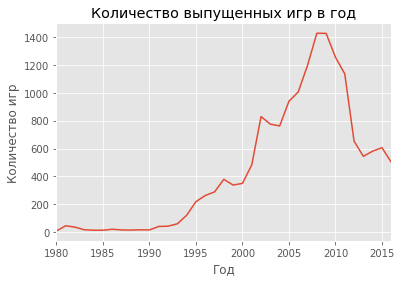

In [108]:
#построение графика количества выпущенных игр в год
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(legend=None)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр в год')
plt.show()


Больше всего компьютерных игр выпускалось в 2008-2009 годах, после этого их количество резко снизилось, хотя в 2015 году опять видим небольшой пик, но это количество даже меньше, чем в начале 2000-х годов.



Посмотрим продажи игр для разных платформ.


<a id='comment5'></a>

In [28]:
#просмотр платформ с наибольшей общей прибылью
(
    data
    .pivot_table(index='platform', values='total_profit', aggfunc='sum')
    .sort_values(by='total_profit', ascending=False).head(10)
)

,total_profit
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53



Видим, что особо выделяются шесть платформ: PS2 - лидер продаж, отличается от второго места в 1,3 раза, X360, PS3, Wii, DS, PS. Продажи по остальным платформам довольно незначительны по сравнению с лидерами.



Теперь оценим распределение продаж по этим шести платформам по годам.


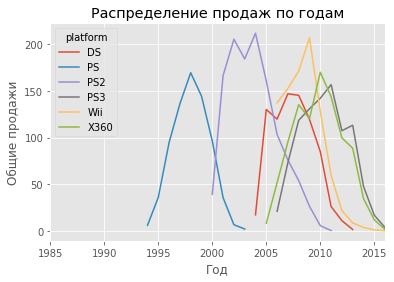

In [29]:
#построение графика по шести платформам с наибольшей прибылью
(
    data
    .query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS")')
    .pivot_table(index='year_of_release', columns='platform', values='total_profit', aggfunc='sum')
    .plot()
)
plt.xlabel('Год')
plt.ylabel('Общие продажи')
plt.title('Распределение продаж по годам')
plt.show()


На этом графике ярко выделяется "срок жизни" платформ: 8-12 лет. За это время продажи по платформам постепенно угасают и можно сделать вывод, что для прогноза продаж на 2017 год не нужно анализировать данные за весь период.



Угасание использования платформы нам не так интересно, мы анализируем только начало возникновения новых платформ, поэтому в качестве актуального периода примем период, равный полному "сроку жизни" платформы, деленному на два, т.е. 6 лет. Актуальный период в данном случае примем с начала 2011 года до конца 2016 года. Этот срок кажется наиболее подходящим лоя последующего исследования данных.


In [30]:
#создание новой таблицы по актуальному периоду
data_actual = data.query('year_of_release >= 2011')

In [31]:
#просмотр информации по платформам с наибольшими продажами по актуальному периоду
(
    data_actual
    .pivot_table(index='platform', values='total_profit', aggfunc='sum')
    .sort_values(by='total_profit', ascending=False)
    .head(10)
)

,total_profit
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81



За последние 10 лет ситуаця по продажам несколько изменилась: на первом месте PS3, а вот X360 удерживает второе место, но разница между ними незначительна.


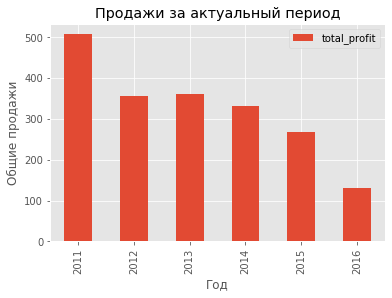

In [32]:
#построение графика продаж по годам за актуальный период
(
    data_actual
    .pivot_table(index='year_of_release', values='total_profit', aggfunc='sum')
    .plot(kind='bar')
)
plt.xlabel('Год')
plt.ylabel('Общие продажи')
plt.title('Продажи за актуальный период')
plt.show()

In [33]:
#создадим таблицу, сгруппированную по годам с общими продажами по платформам
group = (
    data_actual
    .pivot_table(index='year_of_release', columns='platform', values='total_profit', aggfunc='sum')
)

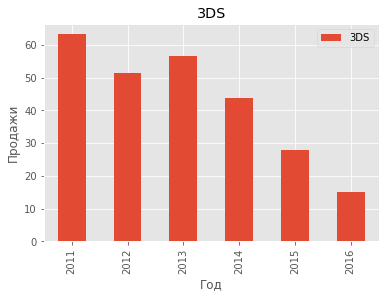

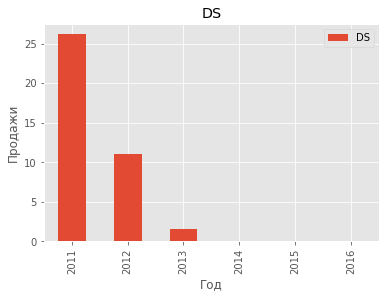

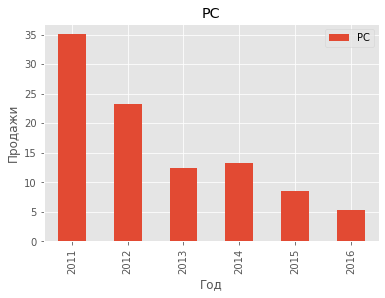

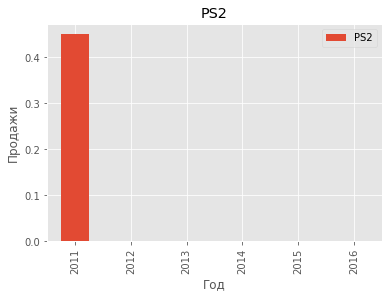

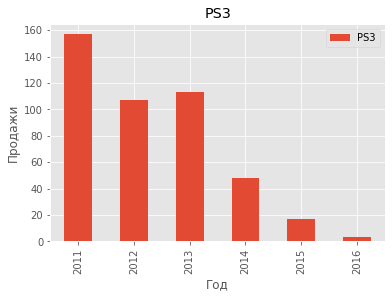

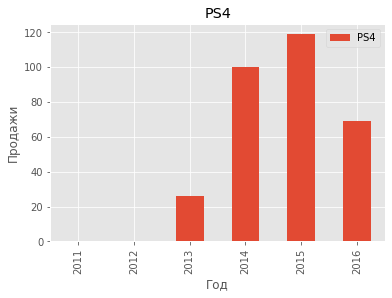

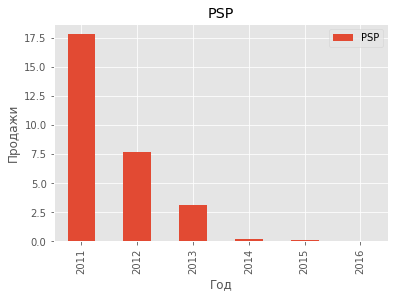

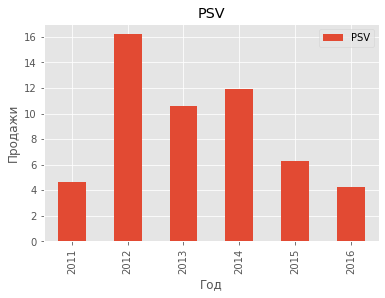

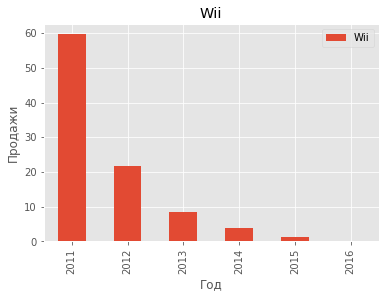

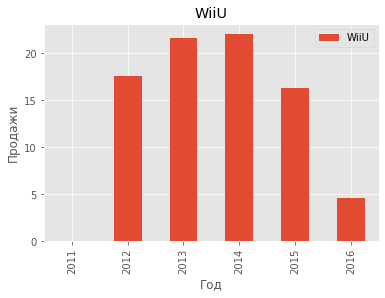

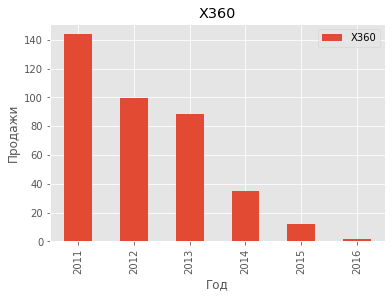

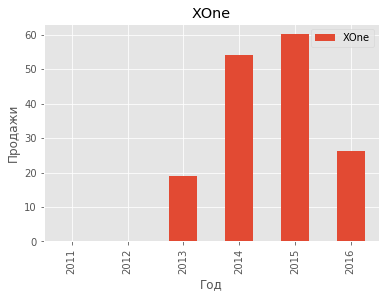

In [34]:
#построим графики с продажами по годам по каждой платформе
for column in group.columns:
    group.plot(y=column, kind='bar', title=column)
    plt.xlabel('Год')
    plt.ylabel('Продажи')


На графиках видно, что некоторые платформы были популярны в начале актуального периода, но к концу 2016 года их популярность угасла. Некоторые же только начали набирать продажи к концу актуального периода. Посмотрим, какие платформы лучше всего продавались в 2016 году.


In [35]:
#просмотр информации по платформам с наибольшими продажами за 2016 год
(
    data_actual
    .query('year_of_release == 2016')
    .pivot_table(index='platform', values='total_profit', aggfunc='sum')
    .sort_values(by='total_profit', ascending=False)
    .head(10)
)

,total_profit
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18



Рассматривая ситуацию в динамике, видим, что продажи по большинству платформ падают. И в 2016 году между ними почти нет разницы, выделяются только три платформы - PS4, XOne и 3DS. Продажи по PS4 при этом в 2,6 раза больше, чем по XOne, а третье место отличается от четвертого почти в три раза!

Учитывая, что продажи по PS4 и XOne начались только в 2013 году, можем предположить, что в дальнейшем продажи по ним будут только расти.


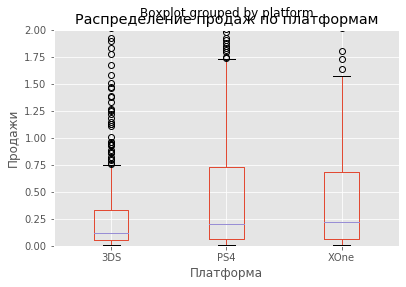

In [36]:
#построим боксплот по платформам с наибольшими продажами
data_actual.query('platform in ("PS4", "XOne", "3DS")').boxplot(column='total_profit', by='platform')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Распределение продаж по платформам')
plt.ylim(0, 2)
plt.show()


Рассматривая распределение продаж компьютерных игр по платформам-лидерам, видим, что, несмотря на значительную разницу в общем значении продаж между первым и вторым местом, по факту медианное значение у них примерно одинаковое. Продажи по 3DS гораздо ниже. Таким образом, мы видим двух конкурентов на рынке среди платформ - PS4 и XOne.



Проверим, влияют ли на продажи внутри платформы PS4 оценки пользователей и критиков.


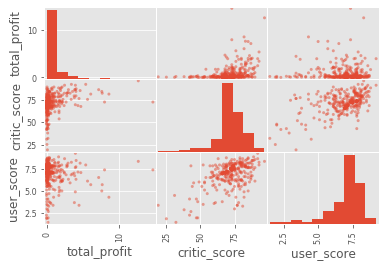

In [37]:
#график-зависимость продаж от оценок пользователей и критиков для PS4
data_ps = data_actual.query('platform in ("PS4")')[['total_profit', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(data_ps);

In [38]:
#коэффициент корреляции общей прибыли от оценок критиков
data_ps['total_profit'].corr(data_ps['critic_score'])

0.35147435925924897


Есть некоторая зависимость продаж от оценок критиков, хоть и довольно незначительная. Однако зависимости продаж от оценок пользователей нет никакой. Очевидно, покупатели больше доверяют оценке критиков.



Посмотрим, какая ситуация по другим платформам-лидерам.


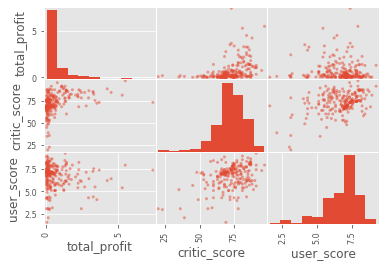

In [39]:
#график-зависимость продаж от оценок пользователей и критиков для XOne
data_xone = data_actual.query('platform in ("XOne")')[['total_profit', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(data_xone);

In [40]:
#коэффициент корреляции общей прибыли от оценок критиков
data_xone['total_profit'].corr(data_xone['critic_score'])

0.37861650130857405

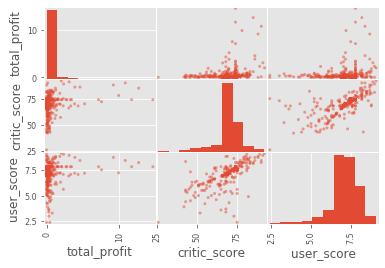

In [41]:
#график-зависимость продаж от оценок пользователей и критиков для 3DS
data_ds = data_actual.query('platform in ("3DS")')[['total_profit', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(data_ds);

In [42]:
#коэффициент корреляции общей прибыли от оценок критиков
data_ds['total_profit'].corr(data_ds['critic_score'])

0.24213768491512225


Зависимость продаж от оценки критиков и зрителей для XOne выглядит абсолютно аналогично зависимости для PS4, даже коэффициенты корреляции совпадают.

Для 3DS зависимости можно сказать, нет никакой. Возможно, это связано с тем, что для этой платформы присутствовало большое количество пропущенных значений, которые пришлось восстанавливать в процессе предобработки данных.



Теперь посмотрим на продажи компьютерных игр не по платформам, а по разным жанрам.


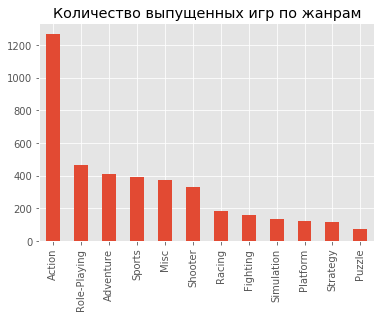

In [43]:
#построение графика количество выпущенных игр по каждому жанру за актуальный период
data_actual['genre'].value_counts().plot(kind='bar')
plt.title('Количество выпущенных игр по жанрам')
plt.show()

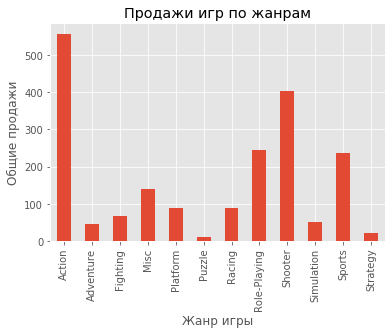

In [44]:
#построение графика суммы продаж по каждому жанру за актуальный период
data_actual.pivot_table(index='genre', values='total_profit', aggfunc='sum').plot(kind='bar', legend=None)
plt.xlabel('Жанр игры')
plt.ylabel('Общие продажи')
plt.title('Продажи игр по жанрам')
plt.show()

In [45]:
#просмотр жанров с наибольшими продажами за актуальный период
(
    data_actual
    .pivot_table(index='genre', values='total_profit', aggfunc='sum')
    .sort_values(by='total_profit', ascending=False)
    .head(6)
)

,total_profit
genre,
Action,557.80
Shooter,402.91
Role-Playing,245.63
Sports,237.15
Misc,139.42
Platform,88.68


In [46]:
#просмотр жанров с наименьшими продажами за актуальный период
(
    data_actual
    .pivot_table(index='genre', values='total_profit', aggfunc='sum')
    .sort_values(by='total_profit', ascending=True)
    .head(6)
)

,total_profit
genre,
Puzzle,9.85
Strategy,22.16
Adventure,45.04
Simulation,50.26
Fighting,66.90
Racing,88.31



Больше всего выпускается игр в стиле Action, они же и являются наиболее прибыльными. Шутеры и спортивные соревнования также очень популярны и хорошо продаются, хотя их выпускается гораздо меньше.

А вот наименьшую прибыль приносят стратегии. Поклонники "Цивилизации" не очень любят тратить деньги.

Что интересно, приключенческий жанр компьютерных игр продается плохо, однако таких игр выпускается гораздо больше, чем шутеров.



### Вывод



В этой части исследования мы проанализировали продажи компьютерных игр в зависимости от платформ и выделили наиболее перспективные в рамках актуального периода: PS4 и XOne. Продажи по ним начались с 2013 года и можно предположить, что в 2017 году они будут только расти.

Также наибольшей популярностью пользуются игры в жанре "экшен", "шутеры" и "спортивные". Наименьшей же - стратерии. Вероятно, играя в компьютерные игры, например, после трудового дня, люди больше всего хотят выпустить пар, а не продолжать думать и принимать решения в стратегических играх.


<a id='chapter5'></a>
## Портрет пользователя


До этого мы изучали продажи, популярные платформы и жанры компьютерных игр в целом по всем регионам. В этой части мы проанализируем эти параметры отдельно для Северной Америки, Европы и Японии.



Вычислим, например, самые топ-5 платформ для регионов.


In [47]:
#просмотр платформ с наибольшими продажами в Северной Америке
(
    data_actual
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
)

,na_sales
platform,
X360,226.80
PS3,168.26
PS4,108.74
XOne,93.12
3DS,82.65


In [48]:
#просмотр платформ с наибольшими продажами в Европе
(
    data_actual
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
)

,eu_sales
platform,
PS3,163.10
PS4,141.09
X360,117.10
3DS,61.27
PC,56.70


In [49]:
#просмотр платформ с наибольшими продажами в Японии
(
    data_actual
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
)

,jp_sales
platform,
3DS,100.62
PS3,49.39
PSP,24.04
PSV,21.84
PS4,15.96



Видим огромную разницу в продажах. Для данных регионов PS4, находящаяся на первом месте по продажам в целом, здесь едва ли входит в пятерку лидеров. В Северной Америке наиболее популярна платформа X360, в Европе - PS3, а в Японии - 3DS. И, если X360 и PS3 хотя бы входят в топ-10 популярных платформ по всему миру, то 3DS даже не входит в это число. Возможно, продажи по ней есть только в Японии.


In [50]:
#просмотр жанров с наибольшими продажами в Северной Америке
(
    data_actual
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
)

,na_sales
genre,
Action,230.92
Shooter,194.43
Sports,108.70
Role-Playing,83.78
Misc,69.69


In [51]:
#просмотр жанров с наибольшими продажами в Европе
(
    data_actual
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
)

,eu_sales
genre,
Action,199.12
Shooter,148.02
Sports,88.48
Role-Playing,62.30
Racing,40.58


In [52]:
#просмотр жанров с наибольшими продажами в Японии
(
    data_actual
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
)

,jp_sales
genre,
Role-Playing,79.87
Action,63.62
Misc,17.60
Fighting,12.38
Platform,12.13



А вот ситуация по жанрам в целом схожая. Экшен популярен везде. В Северной Америке и Европе, как и в целом мире, наиболее популярны жанры "экшен", "шутер" и "спорт". В Японии же на первом месте игры RPG - ролевые компьютерные игры, а также "приключения" входят в топ-5. В какой-то степени, можно сказать, что японцы предпочитают более творческие игры, заставляющие глубже погрузиться в созданный мир и отыгрывать какую-то определенную роль, чтобы отвлечься от реальности.


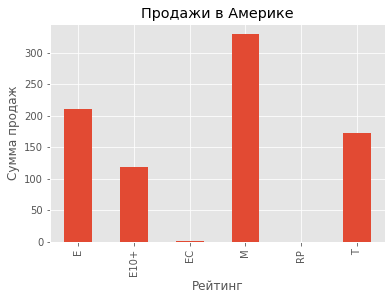

In [53]:
#построение графика с продажами по рейтингу в Северной Америке
data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(kind='bar', legend=None)
plt.xlabel('Рейтинг')
plt.ylabel('Сумма продаж')
plt.title('Продажи в Америке')
plt.show()

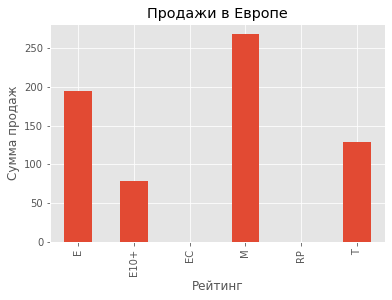

In [54]:
#построение графика с продажами по рейтингу в Европе
data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(kind='bar', legend=None)
plt.xlabel('Рейтинг')
plt.ylabel('Сумма продаж')
plt.title('Продажи в Европе')
plt.show()

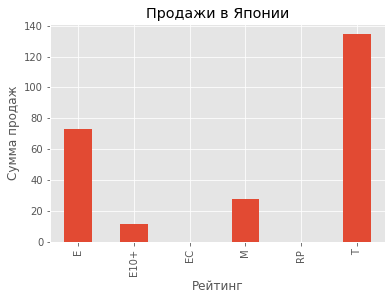

In [55]:
#построение графика с продажами по рейтингу в Японии
data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(kind='bar', legend=None)
plt.xlabel('Рейтинг')
plt.ylabel('Сумма продаж')
plt.title('Продажи в Японии')
plt.show()


Самые популярные игры с рейтингом "для всех". Они отлично продаются во всех регионах, но в Японии наиболее популярные все же игры немного "пожестче" - подростковые.



### Вывод



В целом, мы видим отличия в продажах по разным регионам:

* Северная Америка: предпочитаемые жанры - "экшен", "шутер", "спорт"; популярные платформы - X360, PS3, PS4.

* Европа: предпочитаемые жанры - "экшен", "шутер", "спорт"; популярные платформы - PS3, PS4, X360.

* Япония: предпочитаемые жанры - "ролевые", "экшен", "аркада"; популярные платформы - 3DS, PS3, PSP.


<a id='chapter6'></a>
## Проверка гипотез


Сейчас сформулируем и проверим несколько гипотез.



Во-первых, сравним средние пользовательские рейтинги для платформ XOne и PC.



Нулевая гипотеза: их средние равны.

Альтернативная гипотеза: средние отличаются.

Пороговое значение примем равным 5%.


In [56]:
#просмотр параметров по платформе XOne
data_xbox = data_actual.query('platform == "XOne"')['user_score']
data_xbox.agg(['min', 'mean', 'median', 'max', 'var'])

min       1.600000
mean      6.688520
median    7.048388
max       9.200000
var       1.505903
Name: user_score, dtype: float64

In [57]:
#просмотр параметров по платформе PC
data_pc = data_actual.query('platform == "PC"')['user_score']
data_pc.agg(['min', 'mean', 'median', 'max', 'var'])

min       1.400000
mean      6.608005
median    7.048388
max       9.300000
var       2.150235
Name: user_score, dtype: float64


Мы просмотрели основные параметры для сравниваемых совокупностей. Видим, что их дисперсии отличаются. Поэтому при проверке гипотез используем параметр <i>equal_var=False</i>.


In [58]:
#сопоставление средних для двух совокупностей
result = st.ttest_ind(data_xbox, data_pc, equal_var=False)
print('p-значение:', result.pvalue)
#уровень значимости
alpha = .05
if (result.pvalue < alpha):
    print('Отвергаем гипотезу')
else:
    print('Нет оснований отвергать гипотезу')

p-значение: 0.45549316540865936
Нет оснований отвергать гипотезу



Нет оснований отвергать гипотезу о равенстве средних пользовательских рейтингов для этих двух платформ.



Во-вторых, проверим различаются ли средние пользовательские рейтинги жанров Action и Sports.



Нулевая гипотеза: их средние равны.

Альтернативная гипотеза: средние отличаются.

Пороговое значение примем равным 5%.


In [59]:
#просмотр параметров по жанру Action
data_action = data_actual.query('genre == "Action"')['user_score']
data_action.agg(['min', 'mean', 'median', 'max', 'var'])

min       1.600000
mean      6.896939
median    7.048388
max       9.100000
var       0.973359
Name: user_score, dtype: float64

In [60]:
#просмотр параметров по жанру Sports
data_sports = data_actual.query('genre == "Sports"')['user_score']
data_sports.agg(['min', 'mean', 'median', 'max', 'var'])

min       0.200000
mean      6.293513
median    7.000000
max       8.800000
var       2.571230
Name: user_score, dtype: float64

In [61]:
#сопоставление средних для двух совокупностей
result = st.ttest_ind(data_action, data_sports, equal_var=False)
print('p-значение:', result.pvalue)
#уровень значимости
alpha = .05
if (result.pvalue < alpha):
    print('Отвергаем гипотезу')
else:
    print('Нет оснований отвергать гипотезу')

p-значение: 7.314932383662006e-12
Отвергаем гипотезу



Нулевая гипотеза неверна - средние пользовательские рейтинги данных жанров разные.



### Вывод



В заключительной части работы мы проверили две гипотезы о равенстве средних двух совокупностей:

* пользовательские рейтинги для платформ XOne и PC одинаковые;

* пользовательские рейтинги для жанров Action и Sports разные.

Обе эти гипотезы подтвердились.


<a id='chapter7'></a>
## Общий вывод


В процессе данной работы мы проанализировали продажи компьютерных игр по данным со всего мира.

Мы выяснили, что не обязательно использовать для анализа весь временной интервал: данные 1980-го года вряд ли нам помогут. Актуальный период для анализа составляет примерно 10 лет - за это время появляются новые и исчезают старые платформы.

Наиболее продаваемые игры в последнее время для платформ PS4 и XOne, хотя данные для различных регионов отличаются.

Однако наиболее популярные продукты одни и те же для всех регионов: это игры жанра "экшен". Также по всему миру пользуются большой популярностью "шутеры" и "спорт". Именно на них следует делать ставку для планирования рокламных компаний. Желательно при этом учитывать оценку критиков для данной игры, так как доверие пользователей к ней выше, чем к пользовательским оценкам.

В работе мы проверили две гипотезы о равенстве средних двух совокупностей:

* пользовательские рейтинги для платформ XOne и PC одинаковые;

* пользовательские рейтинги для жанров Action и Sports разные.

Обе эти гипотезы подтвердились.
